<a href="https://colab.research.google.com/github/Gelani-G/NL_lab4/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22NL_lab4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Интеллектуальные вычислительные системы
#Семенков Алексей 420-М1
#Лабораторная работа №4 Идентификация нечеткой системы с помощью генетического алгоритма.
#Генерация начальной популяции. Оператор селекции.
#Операторы скрещивания и мутации
#Вариант 7 (19 номер в списке, вариантов 12, 19-12=7)
# Функция: z = y * sin(x+y)

In [2]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 13.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=1360f37fb08b45b9b08152b82a75fe25b20bc632a44aff6d3c866a98477887ec
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from tabulate import tabulate
from numpy.random import randint
from random import random as rnd
from random import gauss, randrange

In [4]:
num_terms = 9 # Количество термов
X_start = -math.pi/2
X_end = math.pi/2
Y_start = -math.pi/2
Y_end = math.pi/2
Z_start = -0.5
Z_end = 1.5
N = 2 # Количество измененных генов при мутации
number_of_steps = 10 # Количество шагов генетического алгоритма
number_of_chromosomes = 10 # Размер популяции

X_step = (abs(X_start) + abs(X_end)) / num_terms
Y_step = (abs(Y_start) + abs(Y_end)) / num_terms
Z_step = (abs(Z_start) + abs(Z_end)) / num_terms
X = np.arange(X_start, X_end + X_step, X_step)
Y = np.arange(Y_start, Y_end + Y_step, Y_step)
Z = np.arange(Z_start, Z_end + Z_step, Z_step)

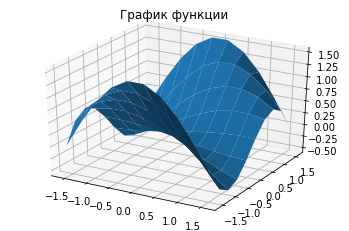

In [5]:
fix, ax = plt.subplots(subplot_kw={"projection": "3d"})
X_var, Y_var = np.meshgrid(X, Y)
Z_var = Y_var * np.sin(X_var + Y_var)
surface = ax.plot_surface(X_var,Y_var,Z_var)
ax.set_zlim()
plt.title('График функции')
plt.show(-0.5, 1.5)

In [6]:
def rules(start, end, num_terms, label):
  terms = []
  for i in np.arange(num_terms):
    terms.append(i)

  step = (abs(start) + abs(end)) / (num_terms - 1)
  func = ctrl.Antecedent(np.arange(start, end + step, step), label)
  ranges = [None] * num_terms
  for i in np.arange(0, num_terms, 1):
    triangle = []
    if i == 0:
      triangle = [start, start, start + step]
      ranges[i] = {}
      ranges[i]['start'] = triangle[1]
      ranges[i]['end'] = triangle[2] - (step / 2)
      ranges[i]['mid'] = triangle[1]
    else:
      triangle = [
                  (i - 1) * step - abs(start),
                  i * step - abs(start),
                  (i + 1) * step - abs(start)
      ]
      if num_terms - 1 == i:
        ranges[i] = {}
        ranges[i]['start'] = triangle[0] + (step / 2)
        ranges[i]['end'] = triangle[1]
        ranges[i]['mid'] = triangle[1]
      else:
        ranges[i] = {}
        ranges[i]['start'] = triangle[0] + (step / 2)
        ranges[i]['end'] = triangle[2] - (step / 2)
        ranges[i]['mid'] = triangle[1]
    func[terms[i]] = fuzz.trimf(func.universe, triangle)
  func.view()
  return ranges

Функция принадлежности для Х:


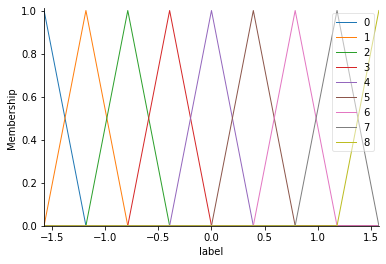

In [7]:
print("Функция принадлежности для Х:")
ranges_X = rules(X[0], X[-1], num_terms, 'label')

Функция принадлежности для Y:


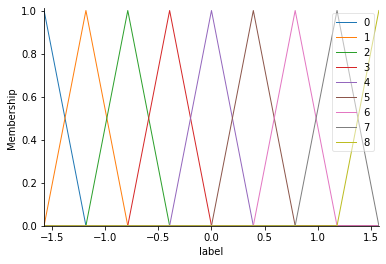

In [8]:
print("Функция принадлежности для Y:")
ranges_Y = rules(Y[0], Y[-1], num_terms, 'label')

Функция принадлежности для Z:


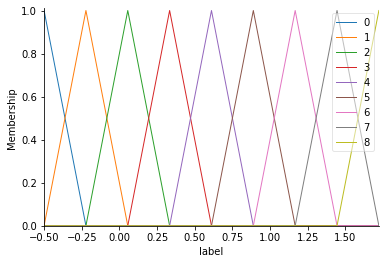

In [9]:
print("Функция принадлежности для Z:")
ranges_Z = rules(Z[0], Z[-1], num_terms, 'label')

In [10]:
print('Параметры функции принадлежности')
fp_params_header = ['№', 'a', 'b', 'c']
fp_params_table = []
for i in range(num_terms):
  print(ranges_X[i])
  fp_params_table.append([i + 1, ranges_X[i]['start'], ranges_X[i]['mid'], ranges_X[i]['end']])

print(tabulate(fp_params_table, fp_params_header))

Параметры функции принадлежности
{'start': -1.5707963267948966, 'end': -1.3744467859455345, 'mid': -1.5707963267948966}
{'start': -1.3744467859455345, 'end': -0.9817477042468102, 'mid': -1.1780972450961724}
{'start': -0.9817477042468103, 'end': -0.589048622548086, 'mid': -0.7853981633974482}
{'start': -0.5890486225480861, 'end': -0.19634954084936188, 'mid': -0.3926990816987239}
{'start': -0.19634954084936182, 'end': 0.19634954084936226, 'mid': 2.220446049250313e-16}
{'start': 0.19634954084936232, 'end': 0.5890486225480867, 'mid': 0.39269908169872436}
{'start': 0.5890486225480864, 'end': 0.9817477042468108, 'mid': 0.7853981633974487}
{'start': 0.9817477042468108, 'end': 1.374446785945535, 'mid': 1.1780972450961729}
{'start': 1.374446785945535, 'end': 1.570796326794897, 'mid': 1.570796326794897}
  №          a             b          c
---  ---------  ------------  ---------
  1  -1.5708    -1.5708       -1.37445
  2  -1.37445   -1.1781       -0.981748
  3  -0.981748  -0.785398     -0.589

In [11]:
# структура хромосомы:
# [ошибка, a11, b11, c11, ..., aij, bij, cij]
# построение первой хромосомы, основанной на параметрах ФП:
chromosome_1 = []
chromosome_1.insert(0, 0)
for i in range(num_terms):
  for j in range(3):
    chromosome_1.append(round(fp_params_table[i][j+1], 3))
 
print(chromosome_1)

[0, -1.571, -1.571, -1.374, -1.374, -1.178, -0.982, -0.982, -0.785, -0.589, -0.589, -0.393, -0.196, -0.196, 0.0, 0.196, 0.196, 0.393, 0.589, 0.589, 0.785, 0.982, 0.982, 1.178, 1.374, 1.374, 1.571, 1.571]


In [12]:
# построение остальных хромосом рандомным способом с ограничениями
def individual(number_of_genes, upper_limit, lower_limit):
  individual = []
  individual.insert(0, 0)
  whole_distance = round((abs(upper_limit) + abs(lower_limit)), 3)
  distance_difference = round((whole_distance / number_of_genes), 3)
  lower_distance_limit = 0
  upper_distance_limit = distance_difference
  for i in range(number_of_genes):
    rnd_value = round((rnd()*distance_difference), 3)
    current_value = round((round(lower_limit, 3) + (i * distance_difference) + rnd_value), 3)
    individual.append(current_value)

  return individual 

In [13]:
# построение популяции хромосом, созданных рандномными значениями ограниченных заданными пределами
def local_population(number_of_individuals, number_of_genes, upper_limit, lower_limit):
  return [individual(number_of_genes, upper_limit, lower_limit) for i in range(number_of_individuals)]

In [14]:
# финальное построение популяции хромосом
def final_population(number_of_individuals):
  number_of_genes = len(chromosome_1)
  upper_limit = X_end
  lower_limit = X_start
  local_chromosomes = local_population(number_of_individuals, number_of_genes, upper_limit, lower_limit)
  return_array = [chromosome_1]
  for i in range(len(local_chromosomes)):
    return_array.append(local_chromosomes[i])

  return_array.pop(0)

  return return_array


In [15]:
# Скрещивание - одна точка (Функция)
def mating(parent1, parent2):
  pivot_point = randint(1, len(parent1))
  offsprings = [
    parent1[0:pivot_point] + parent2[pivot_point:]
  ]
  offsprings.append(parent2[0:pivot_point] + parent1[pivot_point:])

  return offsprings

In [16]:
# проверка попадания детей в популяцию хромосом
def offspring_check(offspring):
  offspring_is_ok = False
  for i in range(len(offspring)):
    if i == (len(offspring) - 1):
      return offspring_is_ok
    if offspring[i] <= offspring[i + 1]:
      offsrping_is_ok = True
    else:
      offspring_is_ok = False
  
  return offspring_is_ok
  

def offsprings_check(offsprings):
  offsprings_are_ok = [False, False]
  if offspring_check(offsprings[0]):
    offsprings_are_ok[0] = True
  
  if offspring_check(offsprings[1]):
    offsprings_are_ok[1] = True

  if False in offsprings_are_ok:
    return False
  else:
    return True

In [17]:
# Оператор мутации - Многоточечная мутация
def individual_mutation(individual, n):
  random_indexes = []
  random_indexes_before = 0
  random_indexes_after = 0

  def calc_random_ind():
    for i in range(n):
      random_indexes.append(randint(1, (len(individual) - 1)))
      random_indexes_before = len(random_indexes)
      random_indexes_after = len(set(random_indexes))

  calc_random_ind()

  while random_indexes_before != random_indexes_after:
    calc_random_ind()

  for i in range(n):
    upper_limit = individual[random_indexes[i] + 1]
    lower_limit = individual[random_indexes[i] - 1]
    new_value = round((rnd()*(upper_limit - lower_limit) + abs(lower_limit)), 3)
    individual[random_indexes[i]] = new_value

  return individual

def mutation(individuals):
  new_chromosomes = []
  for i in range(len(individuals)):
    new_chromosomes.append(individual_mutation(individuals[i], N))

  return new_chromosomes

In [18]:
# Расчет СКО для хромосомы
def sko_error_calc(chromosome):
  SKO = 0
  sko_sum = 0
  etalon_chromosome = []
  for i in range(num_terms):
    for j in range(3):
      etalon_chromosome.append(round(fp_params_table[i][j+1], 3))

  for i in range(len(chromosome)):
    if i < (len(chromosome) - 1):
      sko_sum += np.power((etalon_chromosome[i] - chromosome[i]), 2)
  
  SKO = math.sqrt(sko_sum/len(etalon_chromosome))
  return SKO

In [19]:
# расчет ошибки
def error_calc(chromosomes):
  for i in range(len(chromosomes)):
    chromosomes[i].pop(0)
    sko_error = sko_error_calc(chromosomes[i])
    chromosomes[i].insert(0, sko_error)

  return chromosomes

In [20]:
# создание следующего поколения
# функция отбора
def next_gen(previous_gen, offsprings):
  previous_gen_err = error_calc(previous_gen)
  
  for i in range(2):
    biggest_error = previous_gen_err[0]
    for j in range(len(previous_gen_err)):
      if j < (len(previous_gen_err) - 1):
        if previous_gen_err[j][0] < previous_gen_err[j + 1][0]:
          biggest_error = previous_gen_err[j + 1]

    index_of_biggest_error = previous_gen_err.index(biggest_error)
    previous_gen_err[index_of_biggest_error] = offsprings[i]

  return previous_gen_err

In [21]:
# Нахождение оптимального решения конца выполнения алгоритма
def find_optimized_value(chromosomes):
  lowest_error = chromosomes[0]
  for i in range(len(chromosomes)):
    if i < (len(chromosomes) - 1):
      if chromosomes[i][0] > chromosomes[i + 1][0]:
        lowest_error = chromosomes[i + 1]

  del lowest_error[0]  

  return lowest_error

In [22]:
# функция выполнения программы
def solution():
  chromosomes = final_population(number_of_chromosomes)
  print("Популяция хромосом: {}".format(chromosomes))
  for i in range(number_of_steps):
    print("\nШаг алгоритма: {}".format(i + 1))
    parent1 = chromosomes[0]
    parent2 = chromosomes[randint(1, len(chromosomes))]
    print("Первый родитель: {}".format(parent1))
    print("Второй родитель: {}".format(parent2))
    offsprings = mating(parent1, parent2)
    while offsprings_check(offsprings):
      offsprings = mating(parent1, parent2)
    print("Результат скрещивания: {}".format(offsprings))
    mutated_offsprings = mutation(offsprings)
    print("Результат мутации: {}".format(mutated_offsprings))
    new_gen = next_gen(chromosomes, mutated_offsprings)
    print("Результат селекции: {}".format(new_gen))
  
  optimized_values = find_optimized_value(new_gen)
  print("\nОптимальное решение: {}".format(optimized_values))

In [23]:
solution()

Популяция хромосом: [[0, -1.568, -1.422, -1.32, -1.169, -1.123, -0.952, -0.879, -0.758, -0.591, -0.519, -0.374, -0.238, -0.171, -0.056, 0.043, 0.183, 0.281, 0.353, 0.523, 0.605, 0.721, 0.881, 0.995, 1.063, 1.139, 1.229, 1.45, 1.498], [0, -1.539, -1.444, -1.263, -1.158, -1.102, -0.969, -0.807, -0.701, -0.615, -0.52, -0.446, -0.27, -0.201, -0.085, 0.047, 0.161, 0.266, 0.392, 0.525, 0.557, 0.698, 0.832, 0.904, 1.111, 1.17, 1.29, 1.378, 1.479], [0, -1.507, -1.405, -1.287, -1.228, -1.085, -0.982, -0.834, -0.738, -0.609, -0.476, -0.368, -0.279, -0.214, -0.055, 0.007, 0.187, 0.267, 0.441, 0.485, 0.638, 0.727, 0.82, 0.917, 1.065, 1.134, 1.259, 1.389, 1.54], [0, -1.538, -1.424, -1.338, -1.197, -1.05, -0.967, -0.832, -0.723, -0.6, -0.556, -0.445, -0.316, -0.171, -0.049, 0.057, 0.109, 0.228, 0.342, 0.497, 0.661, 0.673, 0.82, 0.901, 1.095, 1.175, 1.302, 1.383, 1.541], [0, -1.487, -1.394, -1.318, -1.232, -1.032, -1.001, -0.896, -0.73, -0.626, -0.469, -0.401, -0.238, -0.127, -0.004, 0.045, 0.217, 0.